# Understanding Martian Processes Through Principle Component Analysis (PCA)
Research project by Rizma Shaikh

The code below helped us figure out trends and other important ideas that were not seen before cleaning and visualizing. 

In [ ]:
# importing necessary libraries
# for data manipulation and analysis and for data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# File path (Ensure correct local path)
file_path = "/Users/rizmarizma/Downloads/Mars Isotope data.xlsx"

# Load the data
df = pd.read_excel(file_path, sheet_name="Master Data - Whole rock meteor")

# Drop unnecessary columns
drop_columns = ["Meteorite", "Reference", "Sample"]
df.drop(columns=[col for col in drop_columns if col in df.columns], errors="ignore", inplace=True)

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Remove duplicate rows (if any)
df_numeric.drop_duplicates(inplace=True)

# Replace infinite values with NaN
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns that are entirely NaN before imputation
df_numeric.dropna(axis=1, how="all", inplace=True)

# Handle missing values using SimpleImputer (Mean Imputation)
imputer = SimpleImputer(strategy="mean")
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Convert back to DataFrame with correct column names
df_numeric = pd.DataFrame(df_numeric_imputed, columns=df_numeric.columns[:df_numeric_imputed.shape[1]])

# Drop constant columns (zero variance)
df_numeric = df_numeric.loc[:, df_numeric.var() != 0]

# Convert all values to float type (ensures consistency)
df_numeric = df_numeric.astype(float)

# Print basic data stats for verification
print("✅ Data Preprocessing Complete!")
print(f"📊 Final Data Shape: {df_numeric.shape}")
print(f"🧐 Missing Values After Imputation: {df_numeric.isnull().sum().sum()} (should be 0)")
print(f"🔍 Summary Statistics:\n{df_numeric.describe()}")

# Save cleaned dataset for future use
df_numeric.to_csv("cleaned_mars_isotope_data.csv", index=False)
print(df.columns)


✅ Data Preprocessing Complete!
📊 Final Data Shape: (275, 14)
🧐 Missing Values After Imputation: 0 (should be 0)
🔍 Summary Statistics:
        87Rb/86Sr   87Sr/86Sr      Sr ppm  147Sm/144Nd  143Nd/144Nd  \
count  275.000000  275.000000  275.000000   275.000000   275.000000   
mean     0.168125    0.581869   21.476847     0.339165     0.429316   
std      0.071914    0.155220    8.737729     0.078605     0.120281   
min      0.006370    0.000008    0.410961     0.097360     0.000008   
25%      0.168125    0.581869   21.476847     0.339165     0.429316   
50%      0.168125    0.581869   21.476847     0.339165     0.429316   
75%      0.168125    0.701259   21.476847     0.339165     0.512322   
max      0.654800    0.723690   61.900000     0.797780     0.516738   

       206Pb/204Pb  207Pb/204Pb  208Pb/204Pb  176Lu/177Hf  176Hf/177Hf  \
count   275.000000   275.000000   275.000000   275.000000   275.000000   
mean     14.075252    12.040143    29.471343     0.023271     0.283250   
std 

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [4]:
# Apply PCA to explain 95% of variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_scaled)

# Convert to DataFrame
pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=pc_columns)

# Print explained variance
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)


explained_variance_pc1_pc2 = sum(pca.explained_variance_ratio_[:2]) * 100
print(f"Variance explained by first two components: {explained_variance_pc1_pc2:.2f}%")



Explained Variance Ratio by PCA Components: [0.23405797 0.13154845 0.11472384 0.09375479 0.08126879 0.07142857
 0.0694339  0.06249364 0.05096607 0.04180657]
Variance explained by first two components: 36.56%


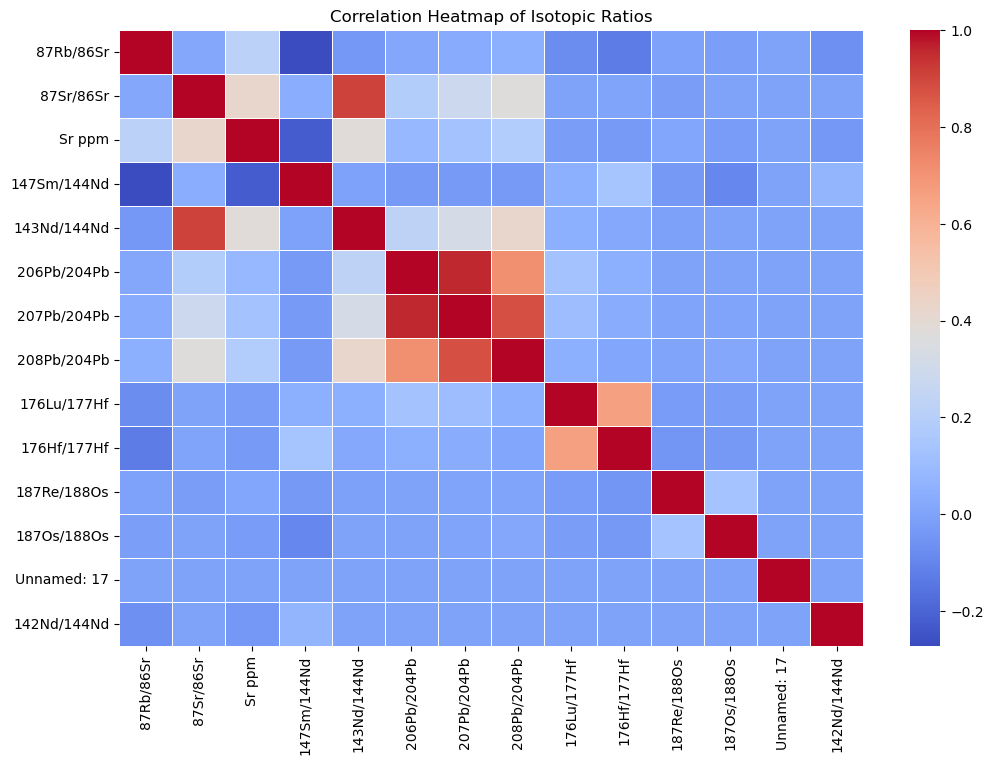

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Isotopic Ratios")
plt.show()

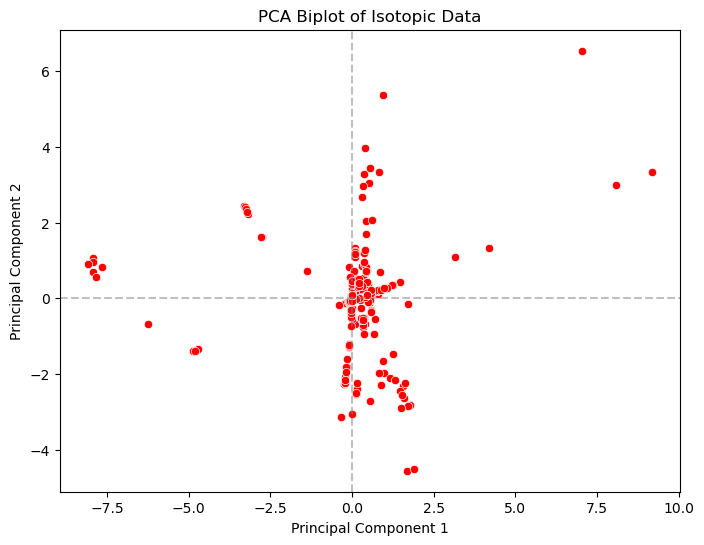

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], color = 'red')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Biplot of Isotopic Data")
plt.axhline(0, linestyle="--", color="grey", alpha=0.5)
plt.axvline(0, linestyle="--", color="grey", alpha=0.5)
plt.show()



📊 PCA Loadings for PC1 and PC2:

                      PC1           PC2
207Pb/204Pb  4.863951e-01  1.641453e-01
208Pb/204Pb  4.773036e-01  7.405512e-02
206Pb/204Pb  4.373289e-01  2.039868e-01
143Nd/144Nd  3.868493e-01 -1.996398e-01
87Sr/86Sr    3.699069e-01 -2.389067e-01
Sr ppm       2.203865e-01 -3.373853e-01
176Lu/177Hf  7.289675e-02  5.102915e-01
176Hf/177Hf  3.704858e-02  5.227447e-01
87Rb/86Sr    3.451232e-02 -2.919223e-01
187Os/188Os  4.911345e-04 -6.253584e-02
Unnamed: 17 -4.915146e-30  1.460030e-28
187Re/188Os -3.776585e-03 -6.075360e-02
142Nd/144Nd -6.115241e-03  6.310740e-02
147Sm/144Nd -3.689512e-02  2.910977e-01


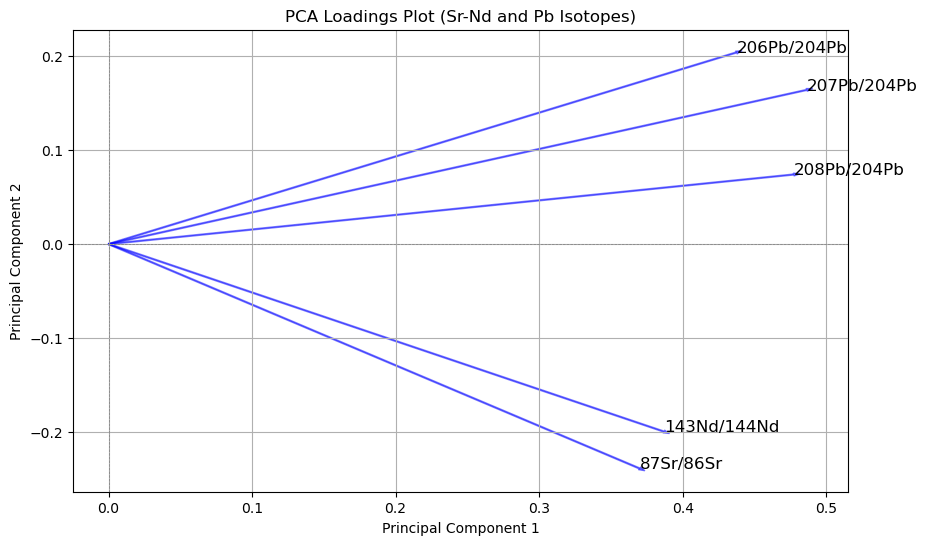

Index(['87Rb/86Sr', '87Sr/86Sr', 'Sr ppm', '147Sm/144Nd', '143Nd/144Nd',
       '206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb', 'Unnamed: 11',
       '176Lu/177Hf', '176Hf/177Hf', '187Re/188Os', '187Os/188Os', 'OsT',
       'Unnamed: 17', '142Nd/144Nd'],
      dtype='object')


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Handle NaN values by replacing them with the column mean
imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(df_numeric)  # Ensure no NaNs remain

# Standardize the data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
principal_components = pca.fit_transform(df_scaled)

# Get PCA loadings (how much each isotope contributes to PC1 and PC2)
loadings = pca.components_

# Convert to DataFrame for readability
loadings_df = pd.DataFrame(loadings[:2], columns=df_numeric.columns, index=['PC1', 'PC2'])

# Print the loadings to see which isotopes contribute most
print("\n📊 PCA Loadings for PC1 and PC2:\n")
print(loadings_df.T.sort_values(by="PC1", ascending=False))  # Sort by PC1 contribution

# Define isotopic groups of interest
sr_nd_ratios = ['87Sr/86Sr', '143Nd/144Nd']
pb_ratios = ['206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb']

# Filter isotopes for PCA loadings
selected_isotopes = sr_nd_ratios + pb_ratios  
loadings = pca.components_.T  # Transpose PCA components
isotope_indices = [i for i, iso in enumerate(df_numeric.columns) if iso in selected_isotopes]

# Create PCA loadings plot for selected isotopes
plt.figure(figsize=(10, 6))
for i in isotope_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color="b", alpha=0.5)
    plt.text(loadings[i, 0], loadings[i, 1], df_numeric.columns[i], fontsize=12)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Loadings Plot (Sr-Nd and Pb Isotopes)")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.5)
plt.grid(True)
plt.show()


# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Number of components
num_components = len(explained_variance)

# Percentage of variance explained by the selected components
variance_covered = sum(explained_variance[:2]) * 100  # First two PCs

print(df.columns)


#### PCA Loadings Plot
<br>
- Pb Isotopes (206Pb/204Pb, 207Pb/204Pb, 208Pb/204Pb) Cluster Together
<br><br>
- The Pb isotope ratios are all pointing in a similar direction in PC1-positive and PC2-positive space.
<br><br>
- This suggests they are highly correlated and might be tracking a common geochemical process, such as crustal contamination or Pb source variation.
<br>
<br>
- Sr-Nd Isotopes (87Sr/86Sr, 143Nd/144Nd) Are in the Opposite Direction
<br><br>
- 87Sr/86Sr and 143Nd/144Nd are positioned in PC1-positive and PC2-negative space, opposite to Pb isotopes.
<br><br>
- This suggests that Sr-Nd isotopic variations are anti-correlated with Pb isotope trends.
<br><br>
- This could indicate that these systems are recording different geochemical processes—perhaps Pb isotopes are more influenced by crustal contamination, while Sr-Nd reflects mantle source heterogeneity.
<br><br>
- PC1 Dominates the Variance Across Isotopes
<br><br>
- All arrows are extending mostly in the PC1 direction, meaning PC1 explains most of the variance in the dataset.
<br><br>
- If PC1 corresponds to differentiation or mantle heterogeneity, then this is the dominant factor separating isotopic compositions.


#### What This Suggests About Martian Meteorites
<br>
- Pb isotopes may record contamination or late-stage differentiation effects. (more mobile and inflenced by crustal interactions)
<br><br>
- Sr-Nd isotopes may be more reflective of mantle sources, showing a different evolutionary history. (less mobile and evolve due to radioactive decay)
<br><br>
- The anti-correlation between Pb and Sr-Nd suggests they are tracing independent processes, possibly related to different reservoirs or mixing events.

Number of components needed to explain 95%+ variance: 11
First 11 principal components [ 0.03451232  0.36990692  0.2203865  -0.03689512  0.3868493   0.43732888
  0.48639511  0.47730362  0.07289675  0.03704858 -0.00377659]
Explained variance ratio: [0.23405797 0.13154845 0.11472384 0.09375479 0.08126879 0.07142857
 0.0694339  0.06249364 0.05096607 0.04180657 0.02400829]
Total variance explained by first 11 components: 97.55%


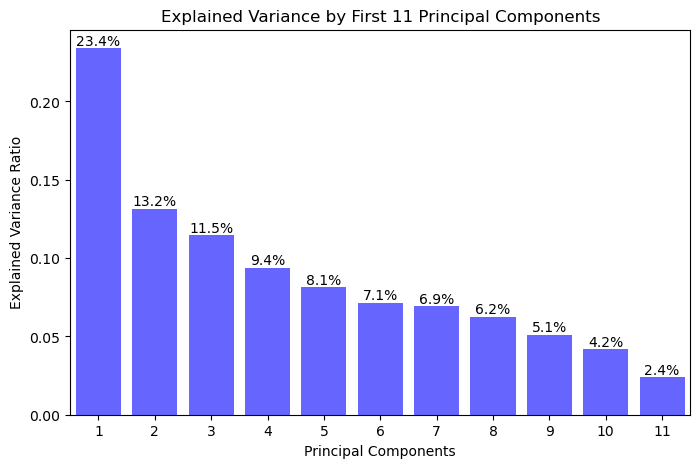

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA without limiting components
pca_full = PCA()
pca_full.fit(df_scaled)

# Find how many components explain 95%+ of the variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.97) + 1  # Find where variance reaches 95%

print(f"Number of components needed to explain 95%+ variance: {num_components_95}")

# Now apply PCA with the correct number of components
pca = PCA(n_components=num_components_95)
principal_components = pca.fit_transform(df_scaled)
print(f'First 11 principal components {pca.components_[0, :11]}')
# Get and print explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Total variance explained by first {num_components_95} components: {sum(explained_variance) * 100:.2f}%")

# Generate explained variance values
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each component
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b')

# Add percentage labels on top of each bar
for bar, variance in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{variance*100:.1f}%", 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title(f'Explained Variance by First {num_components_95} Principal Components')

# Set x-axis to show only whole numbers up to the number of components needed
plt.xticks(np.arange(1, num_components_95 + 1, 1))
plt.xlim(0.5, num_components_95 + 0.5)

plt.show()


⚠️ Warning: No valid data for PCA of All Elements. Skipping PCA plot.


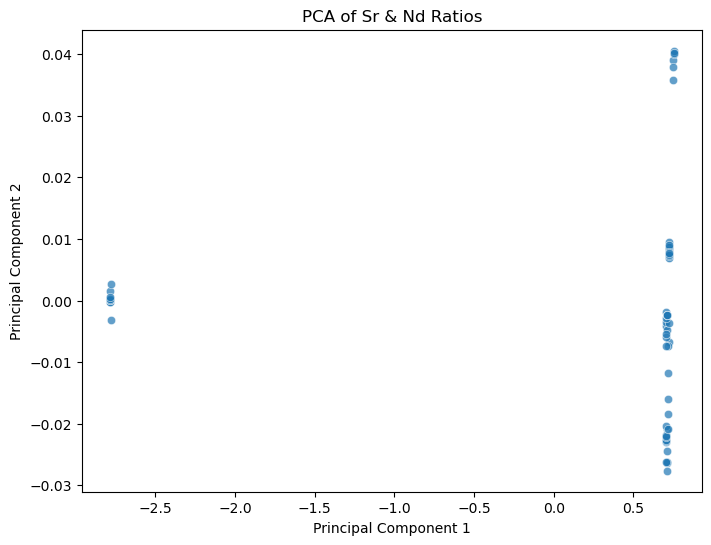

✅ Explained variance ratio for PCA of Sr & Nd Ratios: [9.99875216e-01 1.24784468e-04]



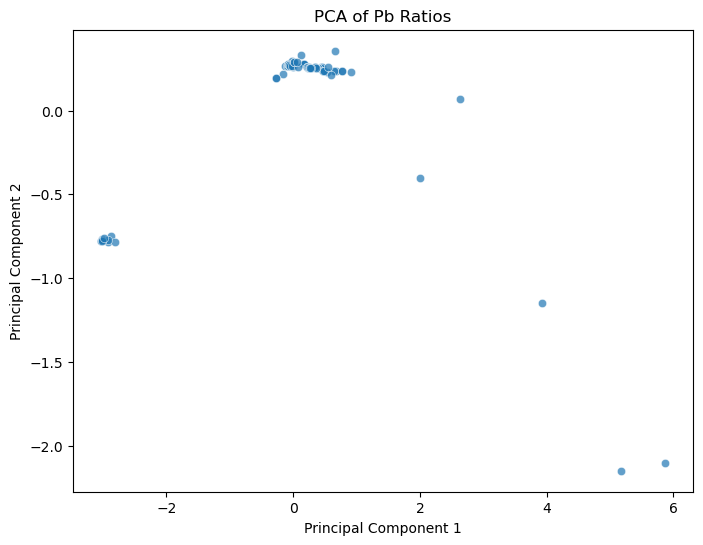

✅ Explained variance ratio for PCA of Pb Ratios: [0.90124555 0.09788616]



In [9]:
def plot_pca_scatter(df, feature_columns, title):
    # Ensure selected columns exist
    df_selected = df[feature_columns].dropna()

    if df_selected.empty:
        print(f"⚠️ Warning: No valid data for {title}. Skipping PCA plot.")
        return

    # Standardize the data
    df_scaled = StandardScaler().fit_transform(df_selected)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Convert to DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

    # Scatter Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.show()

    print(f"✅ Explained variance ratio for {title}: {pca.explained_variance_ratio_}\n")

# Define isotopic groups (isolate Sr and Nd isotopic ratios:)
sr_nd_ratios = ['87Sr/86Sr', '143Nd/144Nd']
#This applies PCA to only Sr and Nd ratios, helping reveal trends in mantle differentiation.
pb_ratios = ['206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb']
#This applies PCA to only Pb isotopic ratios, which are often used to assess crustal contamination.

# Run PCA analysis with debugging
plot_pca_scatter(df, df_numeric.columns, "PCA of All Elements")
plot_pca_scatter(df, sr_nd_ratios, "PCA of Sr & Nd Ratios")
#If PCA shows clustering, it suggests that certain meteorites share a similar mantle source and magmatic evolution.
plot_pca_scatter(df, pb_ratios, "PCA of Pb Ratios")
#If Pb isotope data shows grouping or trends, it suggests different degrees of interaction with the Martian crust.


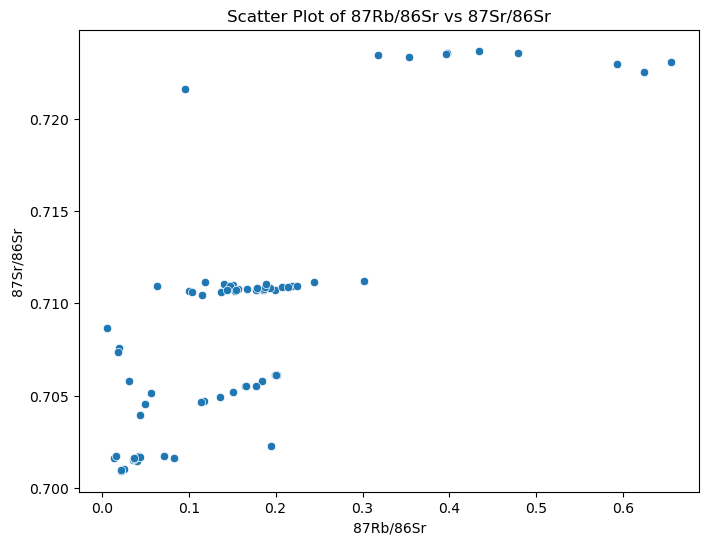

In [10]:
X_Column = '87Rb/86Sr'
Y_Column = '87Sr/86Sr'

# Convert to numeric safely
df[X_Column] = pd.to_numeric(df[X_Column], errors='coerce')
df[Y_Column] = pd.to_numeric(df[Y_Column], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=[X_Column, Y_Column], inplace=True)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=X_Column, y=Y_Column)
plt.title(f"Scatter Plot of {X_Column} vs {Y_Column}")
plt.show()


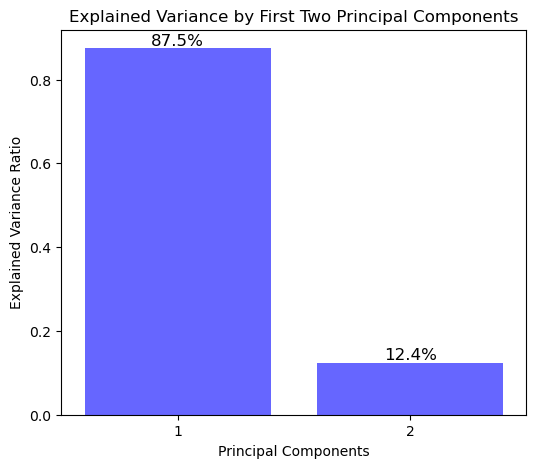

Index(['87Sr/86Sr', '143Nd/144Nd', '206Pb/204Pb', '207Pb/204Pb',
       '208Pb/204Pb'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

selected_isotopes = ['87Sr/86Sr', '143Nd/144Nd', '206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb']  
df_filtered = df_numeric[selected_isotopes]  # Keep only Sr-Nd-Pb isotopes

pca = PCA()
pca.fit(df_filtered)  # Fit PCA using only the selected isotopes

explained_variance = pca.explained_variance_ratio_  # Get variance explained by each component

plt.figure(figsize=(6, 5))
bars = plt.bar(range(1, 3), explained_variance[:2], alpha=0.6, color='b')  # Keep only first two components

# Add percentage labels on top of each bar
for bar, variance in zip(bars, explained_variance[:2]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{variance*100:.1f}%", 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by First Two Principal Components')

# Limit x-axis to first two components
plt.xticks([1, 2])
plt.xlim(0.5, 2.5)  # Ensure only 1 and 2 appear

plt.show()


# Selected isototes giving this information
print(df_filtered.columns)



In [12]:
df.to_csv("cleaned_data.csv", index=False)

Original Data Shape: (323, 13)
Cleaned Data Shape: (277, 13)


/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


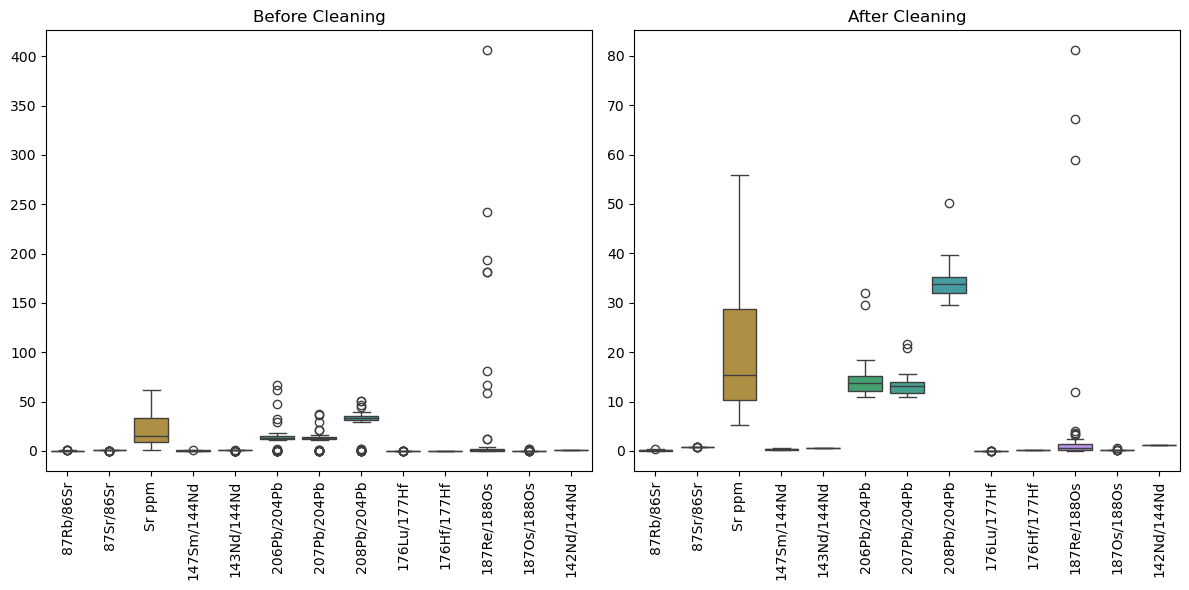

Index(['87Rb/86Sr', '87Sr/86Sr', 'Sr ppm', '147Sm/144Nd', '143Nd/144Nd',
       '206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb', '176Lu/177Hf',
       '176Hf/177Hf', '187Re/188Os', '187Os/188Os', 'OsT', '142Nd/144Nd'],
      dtype='object')


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Excel file

# File path (Ensure correct local path)
file_path = "/Users/rizmarizma/Downloads/Mars Isotope data.xlsx"

# Load the data
df = pd.read_excel(file_path, sheet_name="Master Data - Whole rock meteor")
df = pd.read_excel(file_path, sheet_name="Master Data - Whole rock meteor", usecols=lambda x: 'Unnamed' not in x)

# Drop unnecessary columns if they exist
drop_columns = ["Meteorite", "Reference", "Sample"]
df.drop(columns=[col for col in drop_columns if col in df.columns], errors="ignore", inplace=True)

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute mean and standard deviation for each column
mean_std = df_numeric.agg(['mean', 'std'])

# Define threshold (values that deviate more than 2 standard deviations from the mean)
lower_bound = mean_std.loc['mean'] - 2 * mean_std.loc['std']
upper_bound = mean_std.loc['mean'] + 2 * mean_std.loc['std']

# Identify and remove outliers
df_cleaned = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# Compare original and cleaned data shapes
print(f"Original Data Shape: {df_numeric.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

# Save the cleaned data
df_cleaned.to_csv("cleaned_mars_isotope_data.csv", index=False)

# Plot before and after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_numeric)
plt.title("Before Cleaning")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("After Cleaning")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

print(df.columns)


Box plots of the dataset before and after cleaning:
<br><br>
Left Plot: "Before Cleaning"
<br><br>
- Each boxplot represents the distribution of values for a specific isotopic ratio.
<br><br>
- The box shows the interquartile range (IQR) (25th to 75th percentile), with the median as a horizontal line inside the box.
<br><br>
- Whiskers extend to data points within 1.5 * IQR, and dots outside the whiskers are potential outliers (extreme values).
<br><br>
- Some values are exceptionally high (e.g., above 400), indicating potential data anomalies.
<br><br>
- Since this is the raw data, it has many outliers (dots beyond whiskers).
<br><br>
- Certain variables (e.g., Sr ppm, 206Pb/204Pb, 207Pb/204Pb) have a high spread.
<br>
<br>
<br>
<br>
<br>
Right Plot: "After Cleaning"
<br><br>
- This plot shows the dataset after removing values that deviated more than 2 standard deviations from the mean.
<br><br>
- Fewer outliers should be present, and the distribution should look more compressed compared to the left plot.
<br><br>
- Features appear more compact, suggesting a more normalized distribution.
<br><br>
- The whiskers may be shorter, meaning extreme values have been removed.
<br><br>
- Looks much cleaner (fewer dots outside whiskers).
<br><br>
- Outliers have been significantly reduced, though some remain.
<br><br>
- The vertical scale is much lower (max around 80 instead of 400+), confirming extreme values were removed.
<br><br>
